In [1]:
import numpy as np 
import pandas as pd

In [2]:
carsalesdata=pd.read_csv('car_sales.csv')

In [3]:
carsalesdata

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [8]:
##

import pandas_profiling as pf
pf.ProfileReport(carsalesdata)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [7]:
!pip install pandas_profiling

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
carsalesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [10]:
import os
import seaborn as sns
import pandas_profiling 
%pylab inline
plt.rcParams['figure.figsize']=10,7.5
plt.gray()


Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [13]:
carsalesdata.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [15]:
carsalesdata.columns


Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

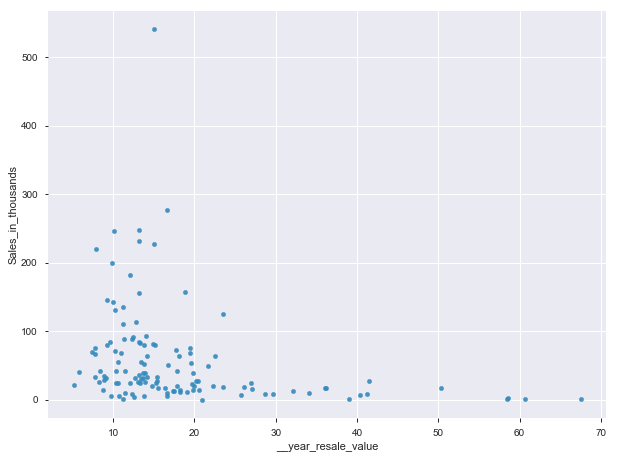

In [16]:
##pandas scatterplot
carsalesdata.plot(kind='scatter',x='__year_resale_value',y='Sales_in_thousands',alpha=0.9)

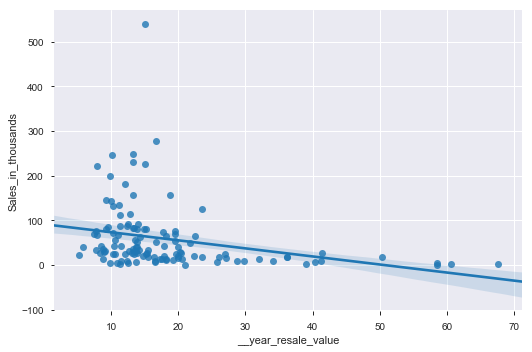

In [18]:
# Seaborn scatter plot with regeression line

sns.lmplot(x='__year_resale_value',y='Sales_in_thousands',data = carsalesdata,aspect =1.5,scatter_kws = {'alpha':0.8})

In [21]:
dict(carsalesdata.dtypes)

{'Manufacturer': dtype('O'),
 'Model': dtype('O'),
 'Sales_in_thousands': dtype('float64'),
 '__year_resale_value': dtype('float64'),
 'Vehicle_type': dtype('O'),
 'Price_in_thousands': dtype('float64'),
 'Engine_size': dtype('float64'),
 'Horsepower': dtype('float64'),
 'Wheelbase': dtype('float64'),
 'Width': dtype('float64'),
 'Length': dtype('float64'),
 'Curb_weight': dtype('float64'),
 'Fuel_capacity': dtype('float64'),
 'Fuel_efficiency': dtype('float64'),
 'Latest_Launch': dtype('O'),
 'Power_perf_factor': dtype('float64')}

In [23]:
numeric_var_names = [key for key in dict(carsalesdata.dtypes)
                    if dict(carsalesdata.dtypes)[key] in
                    ['float64','int64','float32','int32']]
cat_var_names = [key for key in dict(carsalesdata.dtypes)
                if dict(carsalesdata.dtypes)[key] in ['object','O']]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [24]:
car_sales_num = carsalesdata[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [25]:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),
                    x.std()/x.mean(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),
                    x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),
                    x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),
                    x.dropna().quantile(0.99),x.max()],
                index = ['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','CV','MIN','P1','P5','P10','P25','P50','P75','P90',
                         'P95','P99','MAX'])
car_sales_num.apply(var_summary)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
NMISS,0.000000,36.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
SUM,8320.698000,2186.830000,4245.567000,477.500000,29008.000000,16768.000000,11099.400000,29225.600000,523.594000,2800.500000,3672.000000,11941.756636
MEAN,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
MEDIAN,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
STD,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
VAR,4628.002257,131.180007,205.969949,1.091300,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558
CV,1.283621,0.633730,0.523960,0.341290,0.304925,0.071090,0.048515,0.071696,0.186648,0.216574,0.179612,0.326343
MIN,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
P1,0.937280,6.173000,10.231440,1.555000,96.400000,92.875000,66.085000,154.915000,2.245400,11.900000,15.000000,38.461920


In [26]:
# Handling the missing values
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num = car_sales_num.apply(lambda x:Missing_imputation(x))

In [29]:
num_summary = car_sales_num.apply(lambda x:var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,1.283621,0.110000,0.937280,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,260.645320,540.561000
__year_resale_value,157.0,0.0,2697.310000,17.180318,14.180000,10.178562,103.603121,0.592455,5.160000,6.736400,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,59.491000,67.550000
Price_in_thousands,157.0,0.0,4291.165000,27.332261,22.799000,14.268713,203.596176,0.522047,9.235000,10.251160,12.491000,13.976200,18.145000,22.799000,31.930000,43.78800,55.225000,78.327200,85.500000
Engine_size,157.0,0.0,480.500000,3.060510,3.000000,1.041311,1.084328,0.340241,1.000000,1.556000,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,8.000000
Horsepower,157.0,0.0,29185.500000,185.894904,177.500000,56.522319,3194.772538,0.304055,55.000000,96.480000,114.600000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,325.400000,450.000000
Wheelbase,157.0,0.0,16875.000000,107.484076,107.000000,7.616872,58.016732,0.070865,92.600000,92.880000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,134.300000,138.700000
Width,157.0,0.0,11169.950000,71.146178,70.550000,3.441124,11.841331,0.048367,62.600000,66.092000,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,79.188000,79.900000
Length,157.0,0.0,29413.500000,187.347134,187.900000,13.388708,179.257508,0.071465,149.400000,154.968000,163.700000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,219.216000,224.500000
Curb_weight,157.0,0.0,530.278000,3.377567,3.342000,0.626460,0.392452,0.185477,1.895000,2.245600,2.424000,2.612800,2.975000,3.342000,3.778000,4.11740,4.388400,5.396520,5.572000
Fuel_capacity,157.0,0.0,2817.700000,17.947134,17.200000,3.875905,15.022636,0.215962,10.300000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.880000,32.000000


In [ ]:
# Removing Outliers
 

In [33]:
# Log Transformation 
carsalesdata['In_Sales_in_thousands'] = np.log(carsalesdata["Sales_in_thousands"]+1)

In [37]:
#Creating dummy column
col_dummies = pd.get_dummies(carsalesdata['Manufacturer'],prefix = 'd')
col_dummies.head(10)

,d_Acura,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
col_dummies.columns[0]

'd_Acura'

In [40]:
col_dummies.drop(col_dummies.columns[0],axis =1,inplace =True)

In [41]:
col_dummies.head(5)

,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,d_Hyundai,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
col_dummies = pd.get_dummies(car_sales['Vehicle_type'],prefix = 'Vehicle_type'),
col_dummies.drop(col_dummies.columns[0],axis = 1, inplace = True)
car_sales_cat = drop

In [ ]:
# An utility to create dummy variable
def created dummies(df,colname):
    col_dummies = pd.get_dummies(df[colname],prefix = colname)
    col_dummies.drop(col_dummies)

In [ ]:
# For c_feature in categorical features
car_sales_cat = car_sales[['Manufacturer','Vehicle_type']]
for c_feature in ['Manufacturer','Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature]

In [ ]:
car_sales_new = pd.concat([car_sales_num,car_sales_cat],axis = 1)

In [ ]:
#splitting the data

feature_columns = car_sales_new.columns.difference(['In_sales_in_thousands'])
feature_columns

In [ ]:
from sklearn.cross_validation import train_test_split

t